##PCA_Kagle en WhiteWine Dataset

In [3]:
!wget -O whitewine.csv 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

--2020-04-23 07:42:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘whitewine.csv’

whitewine.csv       100%[===================>] 258.23K   488KB/s    in 0.5s    

2020-04-23 07:42:45 (488 KB/s) - ‘whitewine.csv’ saved [264426/264426]



In [4]:
import pandas as pd
ww = pd.read_csv('/content/whitewine.csv',sep=';',index_col=None)
ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
ww_Nan = ww.dropna() #Borro los Nans
print("Shape con Nan: {}, Shape sin Nan: {}".format(ww.shape, ww_Nan.shape))

Shape con Nan: (4898, 12), Shape sin Nan: (4898, 12)


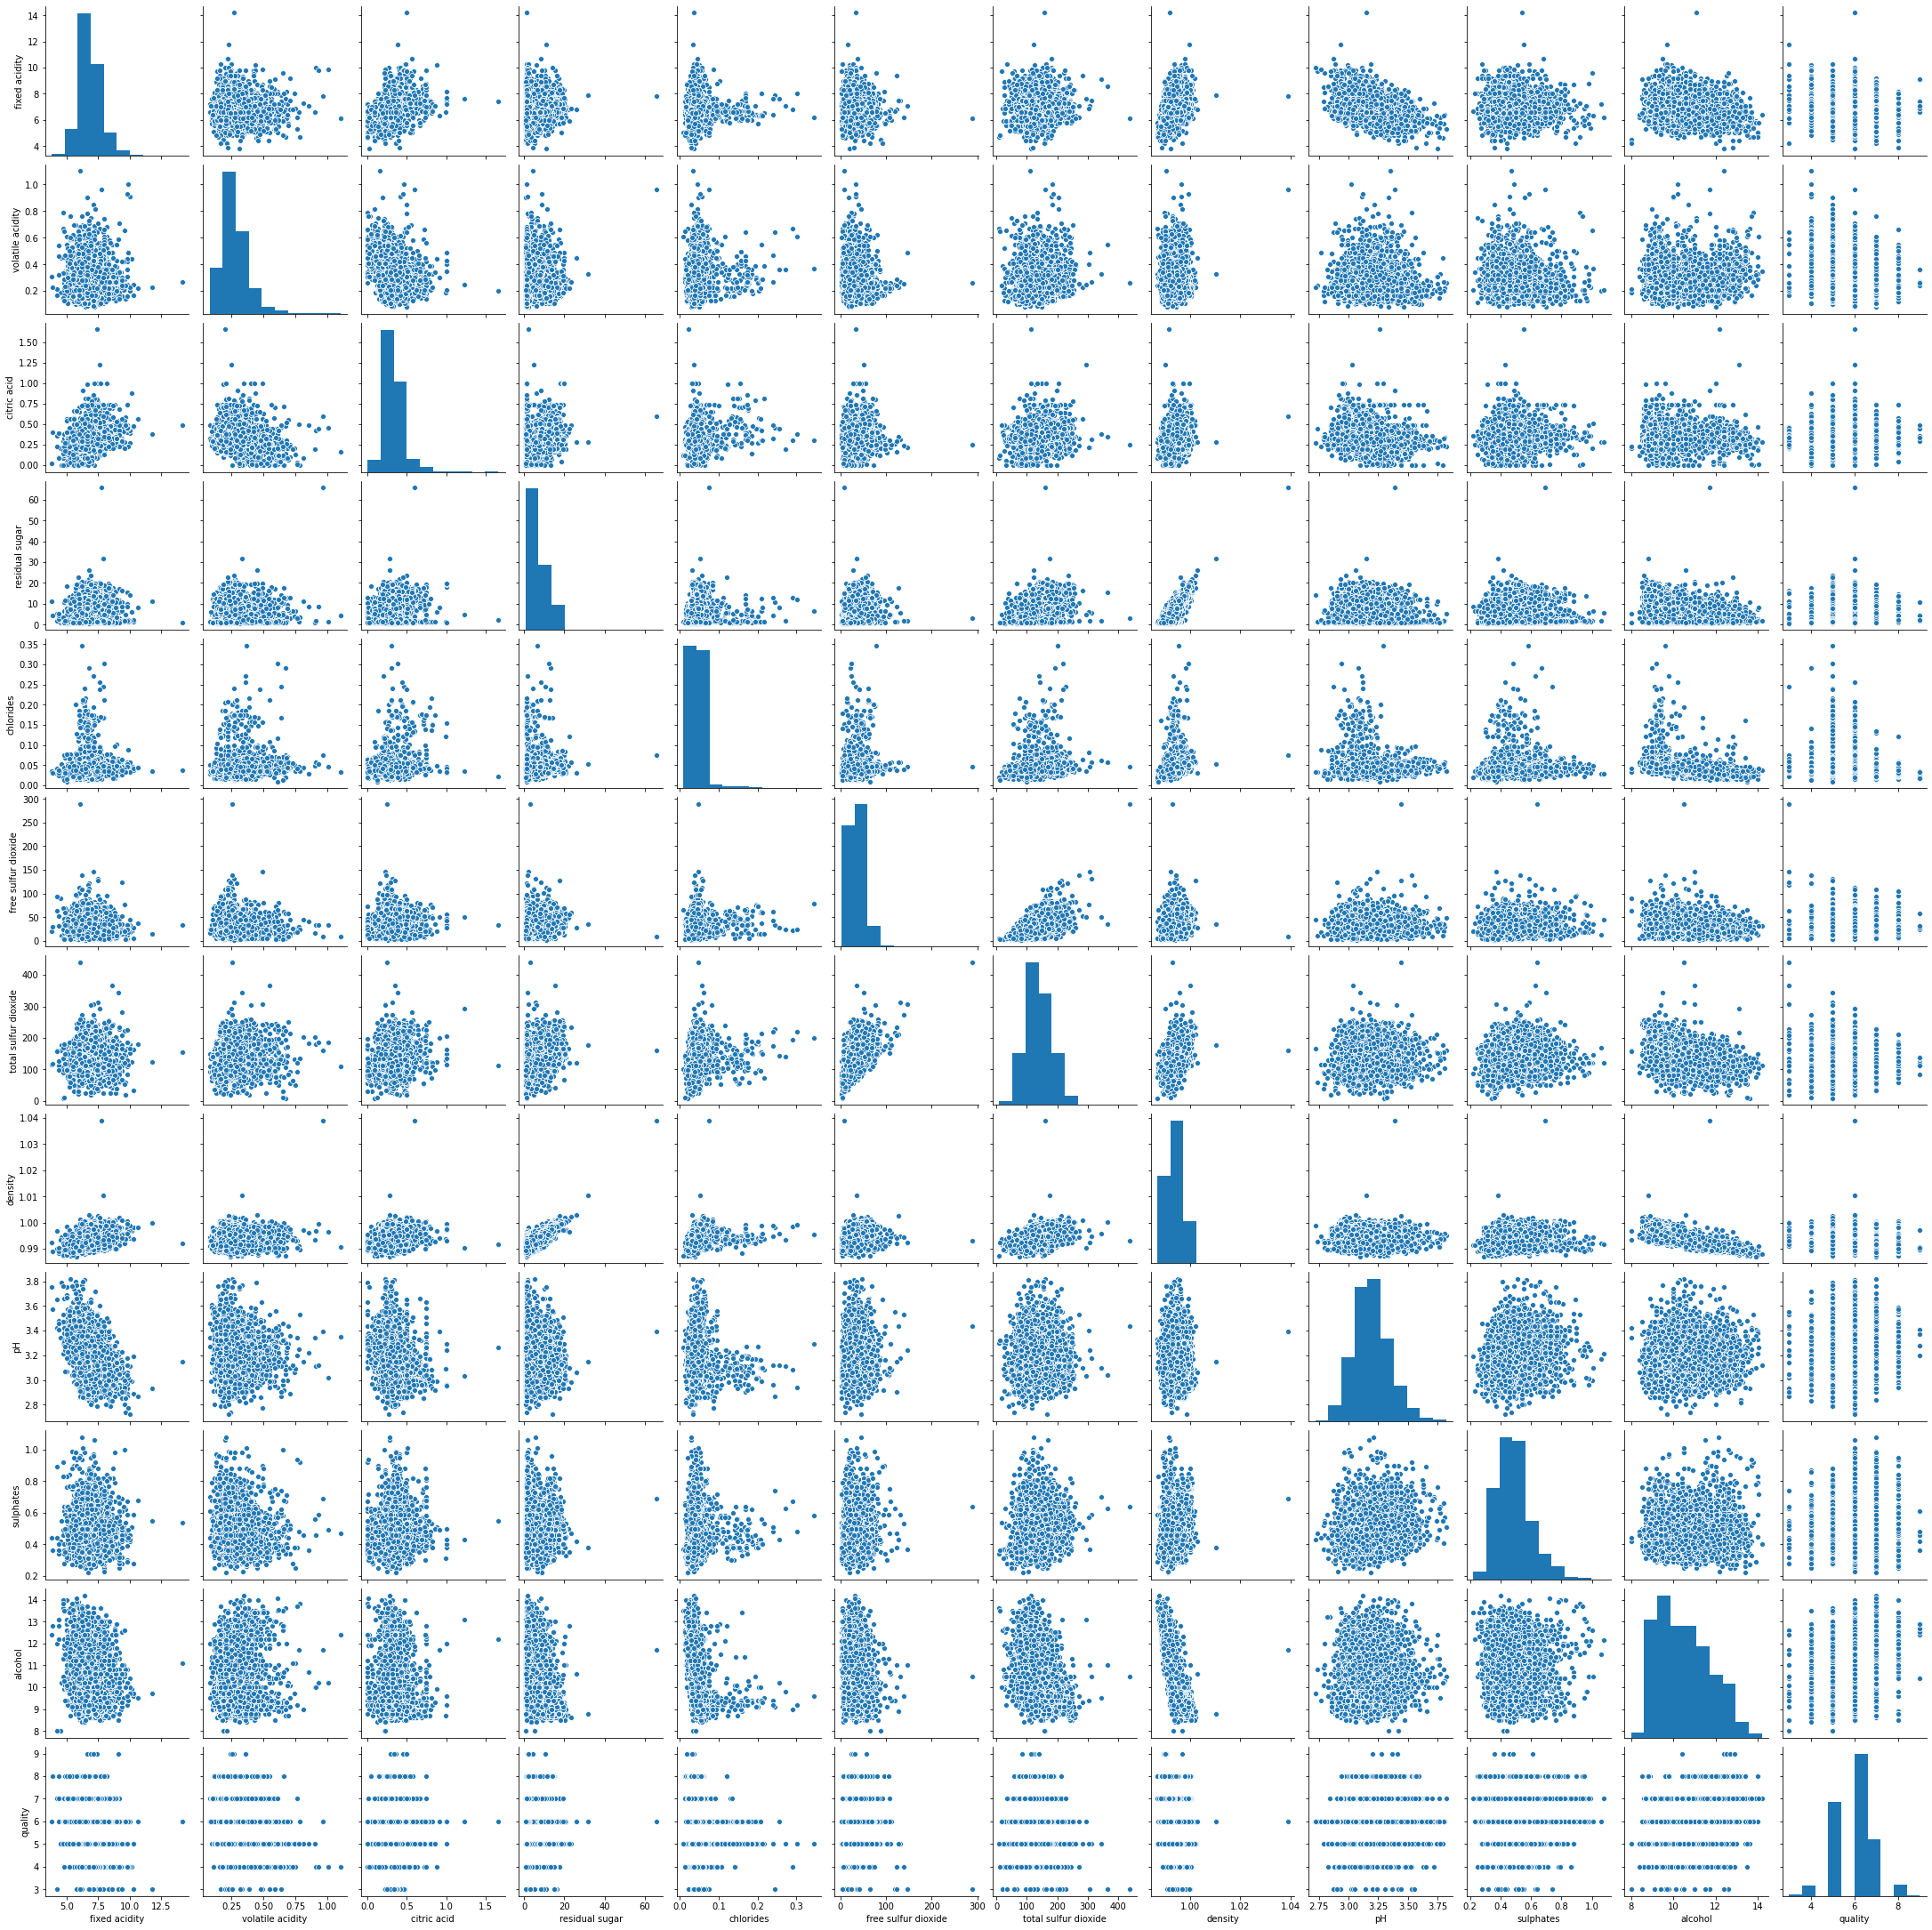

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

fig = sns.pairplot(ww)

In [10]:
from sklearn.preprocessing import StandardScaler
ww_s = StandardScaler().fit_transform(ww)
ww_s.shape

(4898, 12)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=12).fit(ww_s)

In [14]:
100*pca.explained_variance_ratio_

array([27.88890721, 13.21741913, 11.4264338 ,  9.04051251,  8.12736142,
        7.82302457,  6.41040206,  6.03244813,  4.63750856,  2.85777823,
        2.36762849,  0.17057588])

In [15]:
100*pca.explained_variance_ratio_.cumsum()

array([ 27.88890721,  41.10632634,  52.53276014,  61.57327265,
        69.70063407,  77.52365864,  83.93406071,  89.96650883,
        94.60401739,  97.46179563,  99.82942412, 100.        ])

##RFE_Kagle en WhiteWine Dataset

In [16]:
ww_n = ww.select_dtypes(include='number')
ww_drop = ww_n.drop('quality',1)
X = ww_drop
y = ww_n['quality']
print('Data shape: {}'.format(X.shape))


Data shape: (4898, 11)


In [17]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))
print('Ranking of the features: {}'.format(rfe.ranking_))

Mantained features: [False  True False False False False False False False  True False]
Ranking of the features: [ 6  1  5  7  3  9 10  8  4  1  2]


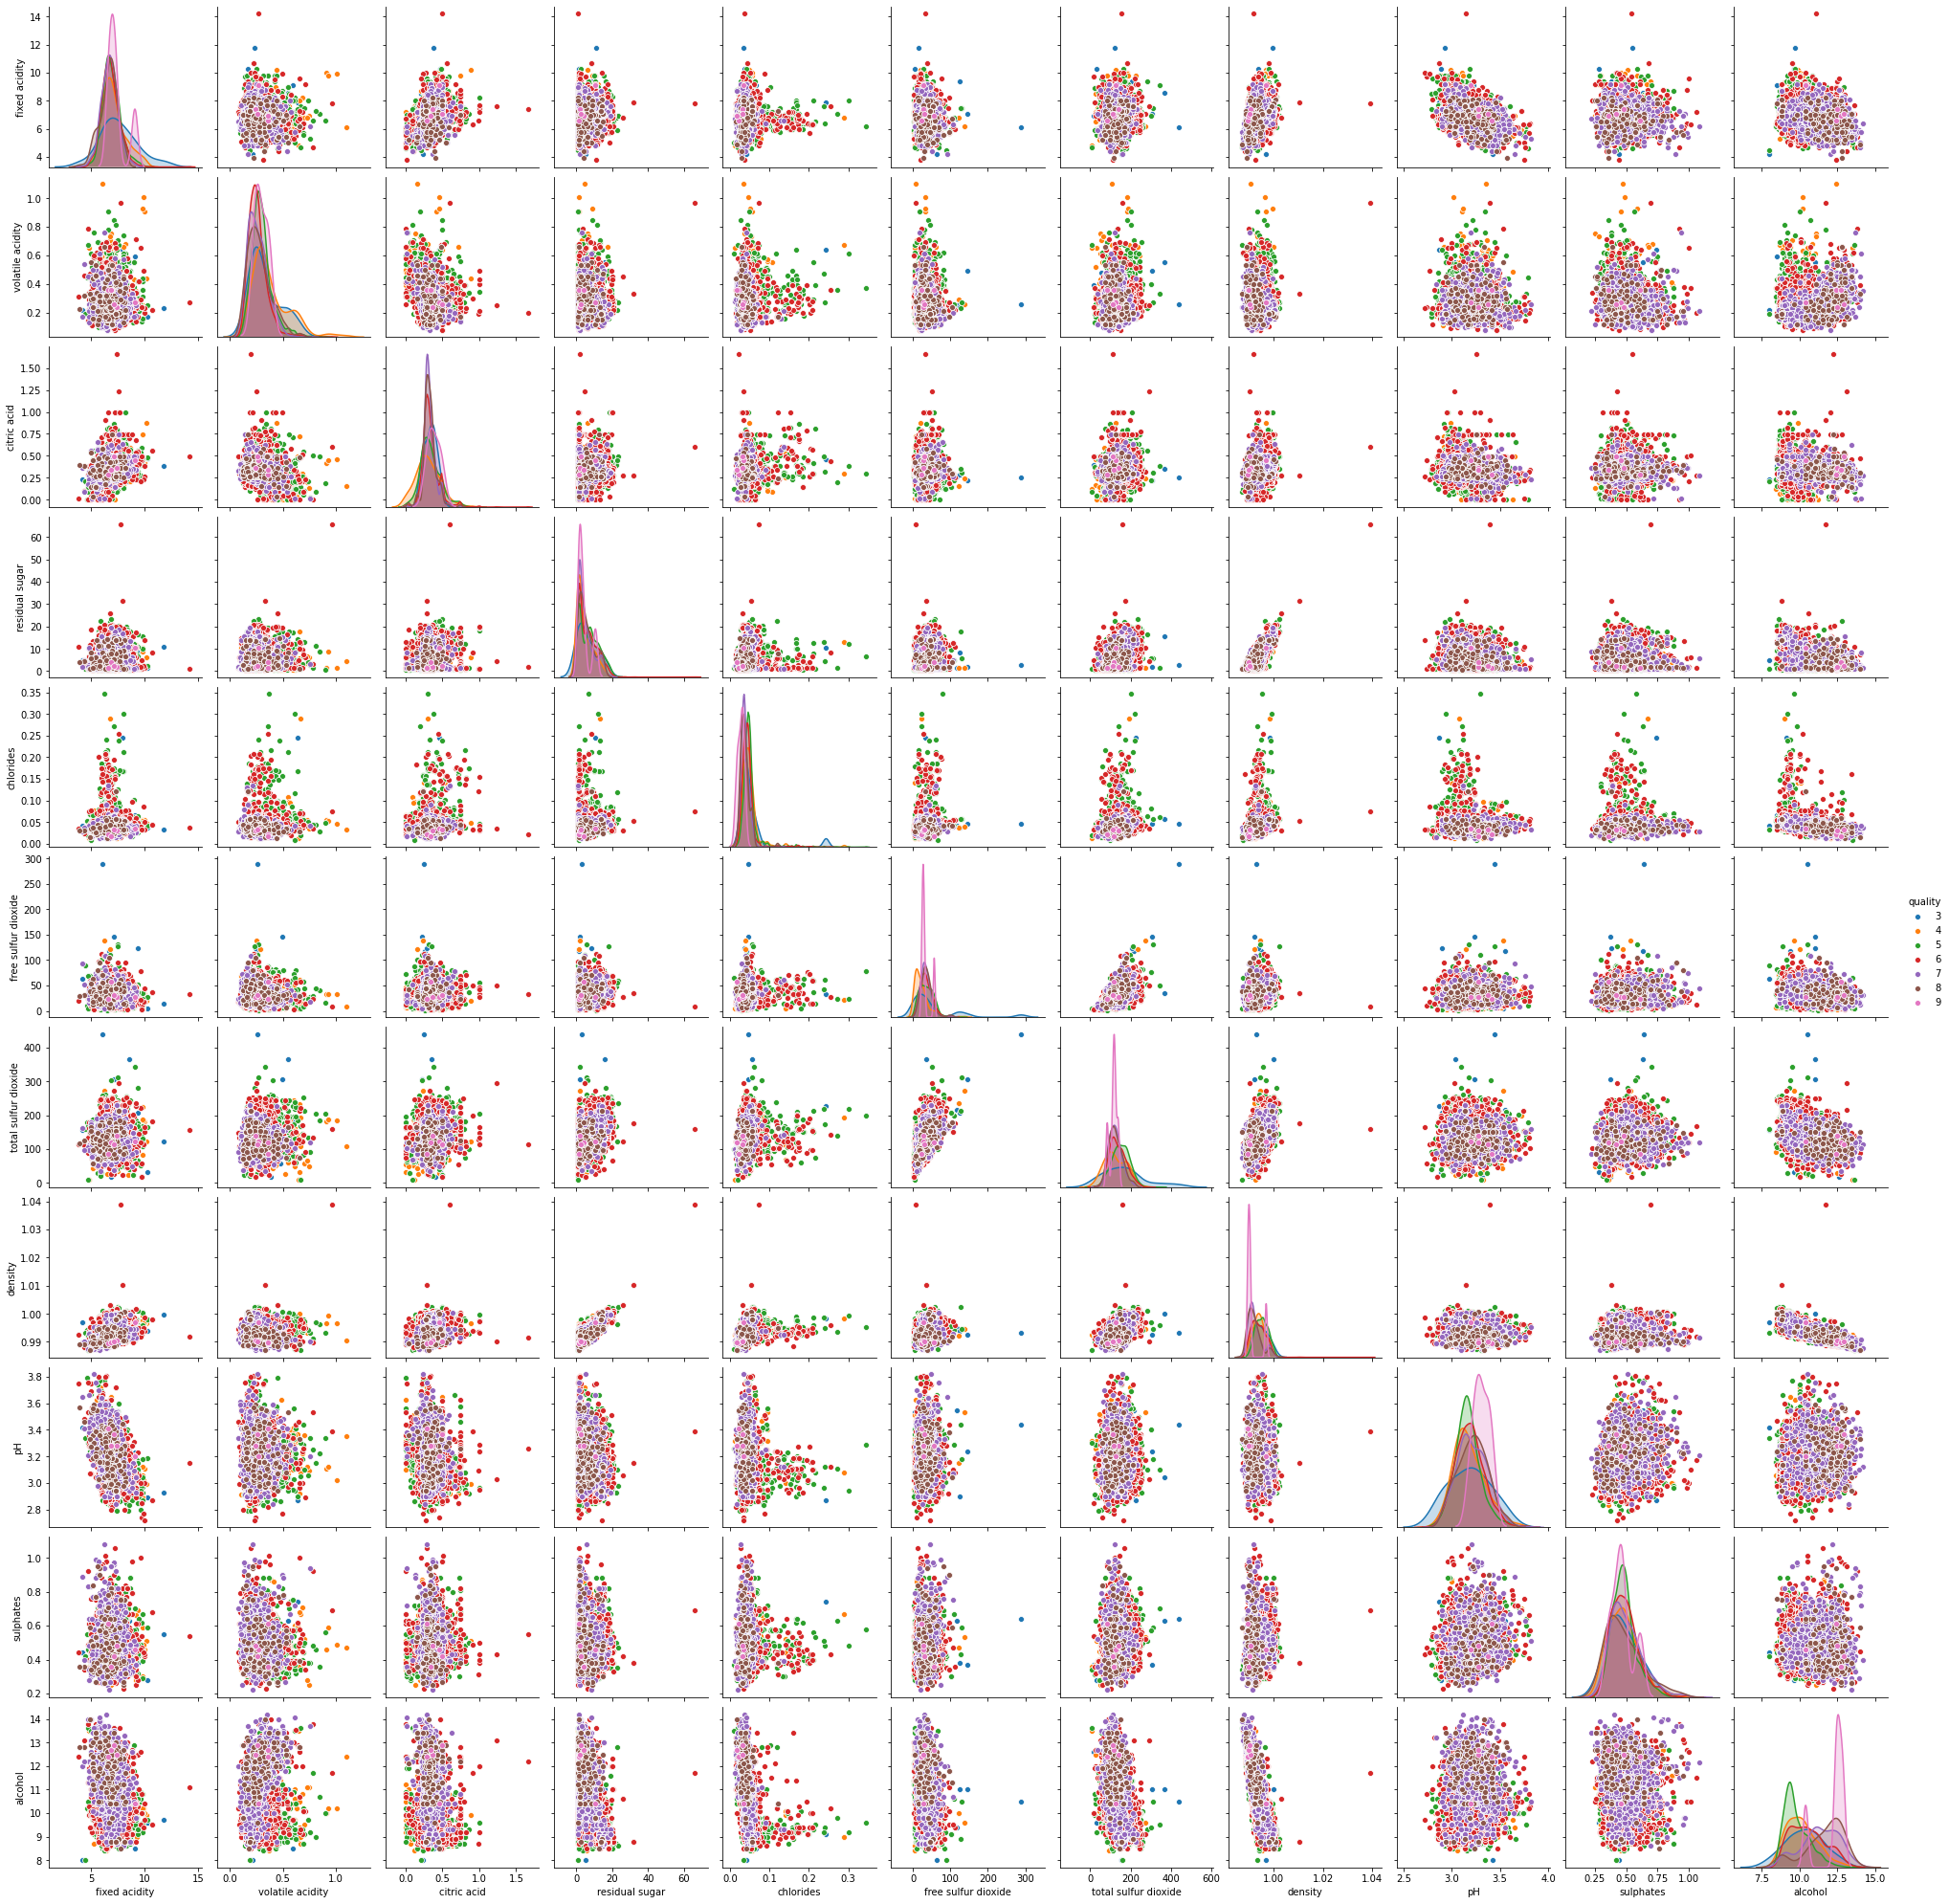

In [0]:
import numpy as np
import matplotlib.pylab as plt

fig = sns.pairplot(ww,hue='quality')